# HW2 - Data Scraping & Taste of Data Analysis

#### Data Science in Korea University
#### COSE471, Spring 2022
#### Due : 4/21 (Thursday)  11:59 PM 












## Fetching coronavirus-19(COVID-19) pandemic data from Wikipedia

In this assignment you will be given several tasks which include data gathering, cleansing and visualization.
The data source will be this wikipedia page https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic featuring several tables for individual countries, subcontinents as well as timelines. You will need to be skillful in using Python to complete these tasks. Good luck!

### We will go through the following steps:
* fetching html containing the data we need using BeautifulSoup
* parsing the html to extract the data in dictionary format
* converting the data to a pandas dataframe
* visualizing the data using pandas and matplotlib

Several guidelines will be provided to help you complete your assignment with ease.

In [1]:
# special IPython command to prepare the notebook for matplotlib
# Please install Python 3.X (not 2.X)
%matplotlib inline 

from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import requests
from bs4 import BeautifulSoup

## 0. Fetching the Wikipedia site

#### The html code normally looks like this (you can even manually inspect it with Chrome, Firefox etc)

> *`<!DOCTYPE html>`*<br/>
> *`<html class="client-nojs" lang="en" dir="ltr">`*<br/>
> *`<head>`*<br/>
> *`<meta charset="UTF-8"/>`*<br/>
> *`<title>Some website name</title>`*<br/>
> *`...`*<br/>
> *`</script>`*<br/>
> *`</body>`*<br/>
> *`</html>`*<br/>

with lots of divs as well... 

##### HINT: Use requests library to fetch the html source


In [2]:
url = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic_by_country_and_territory'
req = None
##################################################################################

# YOUR CODE HERE #
req = requests.get(url)
##################################################################################


## 1. Parsing html code

With the html code, we are going to extract the following tables named, 
* #### COVID-19 cases, deaths, and rates by locations (*from the "Total cases, deaths, and death rates by country" section*)
* #### 2022 monthly cumulative COVID-19 deaths (*from the "Cumulative monthly death totals by country (World Health Organization)" section*)
* #### 2021 (second-half) monthly cumulative COVID-19 deaths (*from the "Cumulative monthly death totals by country (World Health Organization)" section*)
* #### COVID-19 vaccine distribution (*from the "Vaccinations" section*)

After you parsed the html code and retrieve the above four tables,  **print the html source code for each table**.

One of the tables may look like this,

> *`<table class="multiple classes" ...>`*<br/>
> *`<caption><a href="..." title="COVID-19">'''NAME OF THE TABLE<-IMPORTANT''' ... </caption>`*<br/>
> *`<tbody>"..."</tbody>`*<br/>
> *`<th>"..."</th>`*<br/>
> *`<tr>"..."</tr>`*<br/>
> *`...`*<br/>
> *`<tr>"..."</tr>`*<br/>
> *`</table>`*<br/>

##### HINT: First, study the html source and find code blocks related to tabular data. 
##### HINT: Then, use BeautifulSoup to "scrap the tabular data of html by "tracking" elements with class/id attributes


In [3]:
"""Step 1. Study the HTML Source"""
html_source = None
##################################################################################

# YOUR CODE HERE #
html_source = BeautifulSoup(req.content, 'lxml')
print(html_source)

##################################################################################


<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>COVID-19 pandemic by country and territory - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9ca3f41a-f68b-4717-a461-72fcf623caba","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"COVID-19_pandemic_by_country_and_territory","wgTitle":"COVID-19 pandemic by country and territory","wgCurRevisionId":1082165115,"wgRevisionId":1082165115,"wgArticleId":62938755,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 European Spanish-language sources (es)","CS1 maint: uses auth

In [4]:
"""Step 2. Retrieve all the tables (OPTIONAL)"""

##################################################################################

# YOUR CODE HERE #
tables = [None]
######12 13 14 18
for i, tb in enumerate(html_source.find_all('table')):
    if i == 12 or i == 13 or i == 14 or i == 18:
        tables.append(tb)
# 12 COVID-19 cases, deaths, and rates by location[5]
# 13 2022 monthly cumulative COVID-19 deaths
# 14 2021 (second-half) monthly cumulative COVID-19 deaths
# 18 COVID-19 vaccine distribution
##################################################################################



In [5]:
"""Step 3. Get the four tables we need for this assignment and print each of its html source"""
"""Table 1. COVID-19 cases, deaths, and rates by locations"""
##################################################################################

# YOUR CODE HERE #
tables[1]

##################################################################################

<table class="wikitable sortable sortunder tpl-blanktable plainrowheaders plainrowheadersbg sticky-col2" style="text-align: right; margin-top: 0;">
<caption><a href="/wiki/COVID-19" title="COVID-19">COVID-19</a> cases, deaths, and rates by <a class="mw-selflink selflink">location</a><sup class="reference" id="cite_ref-Template:COVID-19_data_6-5"><a href="#cite_note-Template:COVID-19_data-6">[5]</a></sup>
</caption>
<tbody><tr class="sticky-row">
<th class="unsortable" style="padding-bottom: 1em;">
</th>
<th scope="col" style="padding-bottom: 1em;">Country
</th>
<th scope="col" style="padding-bottom: 1em;"><abbr title="Deaths per million">Deaths / million</abbr>
</th>
<th scope="col" style="padding-bottom: 1em;">Deaths
</th>
<th scope="col" style="padding-bottom: 1em;">Cases
</th></tr>
<tr class="sorttop static-row-header">
<td data-sort-value="World" style="text-align: center;"><img alt="" data-file-height="20" data-file-width="20" decoding="async" height="16" src="//upload.wikimedia.o

In [6]:
"""Table 2. 2022 monthly cumulative COVID-19 deaths"""
##################################################################################

# YOUR CODE HERE #

tables[2]

##################################################################################

<table class="wikitable sortable tpl-blanktable plainrowheaders plainrowheadersbg sticky-col2" style="text-align: right; margin-top: 0;">
<caption>2022 monthly cumulative COVID-19 deaths<sup class="reference" id="cite_ref-WHO-csv_30-0"><a href="#cite_note-WHO-csv-30">[22]</a></sup><sup class="reference" id="cite_ref-WHO-dashboard_31-0"><a href="#cite_note-WHO-dashboard-31">[23]</a></sup><sup class="reference" id="cite_ref-WHO-reports_32-0"><a href="#cite_note-WHO-reports-32">[24]</a></sup>
</caption>
<tbody><tr class="sticky-row">
<th class="unsortable">
</th>
<th scope="col">Location
</th>
<th scope="col"><abbr title="January">Jan</abbr> 1
</th>
<th scope="col"><abbr title="February">Feb</abbr> 1
</th>
<th class="headerSortDown" scope="col"><abbr title="March">Mar</abbr> 1
</th></tr>
<tr class="sorttop">
<td style="text-align:center"><img alt="" data-file-height="20" data-file-width="20" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/OOjs_UI_icon

In [7]:
"""Table 3. 2021 (second-half) monthly cumulative COVID-19 deaths"""
##################################################################################

# YOUR CODE HERE #

tables[3]

##################################################################################

<table class="wikitable sortable tpl-blanktable plainrowheaders plainrowheadersbg sticky-col2" style="text-align: right; margin-top: 0;">
<caption>2021 (second-half) monthly cumulative COVID-19 deaths<sup class="reference" id="cite_ref-WHO-csv_30-1"><a href="#cite_note-WHO-csv-30">[22]</a></sup><sup class="reference" id="cite_ref-WHO-dashboard_31-1"><a href="#cite_note-WHO-dashboard-31">[23]</a></sup><sup class="reference" id="cite_ref-WHO-reports_32-1"><a href="#cite_note-WHO-reports-32">[24]</a></sup>
</caption>
<tbody><tr class="sticky-row">
<th class="unsortable">
</th>
<th scope="col">Location
</th>
<th scope="col"><abbr title="July">Jul</abbr> 1
</th>
<th scope="col"><abbr title="August">Aug</abbr> 1
</th>
<th scope="col"><abbr title="September">Sep</abbr> 1
</th>
<th scope="col"><abbr title="October">Oct</abbr> 1
</th>
<th scope="col"><abbr title="November">Nov</abbr> 1
</th>
<th class="headerSortDown" scope="col"><abbr title="December">Dec</abbr> 1
</th></tr>
<tr class="sorttop

In [8]:
"""Table 4. COVID-19 vaccine distribution"""
##################################################################################

# YOUR CODE HERE #

tables[4]

##################################################################################

<table class="wikitable sortable sortunder tpl-blanktable plainrowheaders plainrowheadersbg sticky-col2" style="text-align: right; margin-top: 0;">
<caption><a href="/wiki/Deployment_of_COVID-19_vaccines" title="Deployment of COVID-19 vaccines">COVID-19 vaccine distribution</a> by country<sup class="reference" id="cite_ref-Template:COVID-19_data_6-6"><a href="#cite_note-Template:COVID-19_data-6">[5]</a></sup>
</caption>
<tbody><tr class="sticky-row">
<th class="unsortable" style="padding-bottom: 1em;">
</th>
<th scope="col" style="padding-bottom: 1em;">Location
</th>
<th scope="col" style="padding-bottom: 1em;">Vaccinated<sup class="reference" id="cite_ref-38"><a href="#cite_note-38">[a]</a></sup>
</th>
<th scope="col" style="padding-bottom: 1em;">Percent<sup class="reference" id="cite_ref-39"><a href="#cite_note-39">[b]</a></sup>
</th></tr>
<tr class="sorttop static-row-header">
<td data-sort-value="World" style="text-align: center;"><img alt="" data-file-height="20" data-file-width="

## 2. Extracting data from the four tables and converting them into four dictionaries (Python data stucture)
With the four tables, we are going to extract data and convert each of them into a dictionary 

*ALL FOUR DICTIONARIES must be printed!!*

##### HINT: A pythonic dictionary from one of the tables will look like this,
- { *some index 1*: { *some column 1*: *some value 1*, *some column 2*: *some value 2*, ...}, 
    *some index 2*: { *some column 1*: *some value 1*, *some column 2*: *some value 2*, ...}}
- *Dictionary data structure does not have order between Keys, so it may show up in different order(index).  You don't need to be worried of it*

In [9]:
"""Hint 1. Examine the actual table posted in the Wikipedia page and identify the columns."""
"""Hint 2. These columns will be necessary for converting the html-based data to dictionary format."""
"""Hint 3. Beautiful soup will help you get all you need."""


"""Table 1. COVID-19 cases, deaths, and rates by locations"""
output_dict1 = dict()
##################################################################################

# YOUR CODE HERE #

# print(output_dict1) should look like the below cell!
######

col_list = []
country_list = []
# col_list = ['Deaths / million', 'Deaths', 'Cases'].
# i = 6 -> Peru, i = 220 -> Marshall Islands
# split('[') for removing wiki footnote European Union[b] -> European Union
for i, th in enumerate(tables[1].find_all('th')):
    if i >= 2 and i <= 4:
        col_list.append(th.get_text().strip())
    if i >= 6 and i <= 220:
        country_list.append(th.get_text().strip().split('[')[0])
# td index (5, 6, 7),  (9, 10, 11) ...
for j in range(len(country_list)):
    output_dict1[country_list[j]] = {col_list[0] : tables[1].find_all('td')[4*j + 5].get_text().strip().replace(',', ''),
                               col_list[1] : tables[1].find_all('td')[4*j + 6].get_text().strip().replace(',', ''),
                               col_list[2] : tables[1].find_all('td')[4*j + 7].get_text().strip().replace(',', '')}
##################################################################################

In [10]:
"""
    {
        'Peru': {'Deaths / million': '6365', 'Deaths': '212354', 'Cases': '3548717'},
        'Bulgaria': ...,
        ...
        'Marshall Island': ...
    }   
"""
output_dict1

{'Peru': {'Deaths / million': '6370', 'Deaths': '212528', 'Cases': '3552467'},
 'Bulgaria': {'Deaths / million': '5327',
  'Deaths': '36740',
  'Cases': '1147165'},
 'Bosnia and Herzegovina': {'Deaths / million': '4823',
  'Deaths': '15742',
  'Cases': '376264'},
 'Hungary': {'Deaths / million': '4755',
  'Deaths': '45812',
  'Cases': '1874206'},
 'North Macedonia': {'Deaths / million': '4444',
  'Deaths': '9256',
  'Cases': '307967'},
 'Montenegro': {'Deaths / million': '4311',
  'Deaths': '2708',
  'Cases': '233834'},
 'Georgia': {'Deaths / million': '4216',
  'Deaths': '16779',
  'Cases': '1651969'},
 'Croatia': {'Deaths / million': '3846',
  'Deaths': '15702',
  'Cases': '1109847'},
 'Czech Republic': {'Deaths / million': '3723',
  'Deaths': '39933',
  'Cases': '3872522'},
 'Slovakia': {'Deaths / million': '3600',
  'Deaths': '19618',
  'Cases': '2495855'},
 'Romania': {'Deaths / million': '3411',
  'Deaths': '65249',
  'Cases': '2875942'},
 'San Marino': {'Deaths / million': '3351

In [11]:
"""Table 2. 2022 monthly cumulative COVID-19 deaths"""
output_dict2 = dict()
##################################################################################

# YOUR CODE HERE #

# print(output_dict2) should look like the below cell!

#print(tables[2])
col_list = []
country_list = []
# col_list = ['Jan 1', 'Feb 1', 'Mar 1']
# i = 6 -> United States, i = 242 -> Vanuatu
for i, th in enumerate(tables[2].find_all('th')):
    #print(i, th.get_text().strip())
    if i >= 2 and i <= 4:
        col_list.append(th.get_text().strip())
    if i >= 6 and i <= 242:
        country_list.append(th.get_text().strip())
        
for j in range(len(country_list)):
    output_dict2[country_list[j]] = {col_list[0] : tables[2].find_all('td')[4*j + 5].get_text().strip().replace(',', ''),
                               col_list[1] : tables[2].find_all('td')[4*j + 6].get_text().strip().replace(',', ''),
                               col_list[2] : tables[2].find_all('td')[4*j + 7].get_text().strip().replace(',', '')}
##################################################################################

In [12]:
"""
    {
        'United States': {'Jan 1': '819197', 'Feb 1': '881867', 'Mar 1': '941112'},
        'Brazil': ...,
        ...
        'Vanuatu': ...
    }   
"""
output_dict2

{'United States': {'Jan 1': '819197', 'Feb 1': '881867', 'Mar 1': '941112'},
 'Brazil': {'Jan 1': '618984', 'Feb 1': '626854', 'Mar 1': '649134'},
 'India': {'Jan 1': '481486', 'Feb 1': '496242', 'Mar 1': '514023'},
 'Russia': {'Jan 1': '309707', 'Feb 1': '332012', 'Mar 1': '352446'},
 'Mexico': {'Jan 1': '301663', 'Feb 1': '310131', 'Mar 1': '318149'},
 'Peru': {'Jan 1': '202653', 'Feb 1': '205505', 'Mar 1': '210538'},
 'United Kingdom': {'Jan 1': '149790', 'Feb 1': '157677', 'Mar 1': '161754'},
 'Italy': {'Jan 1': '137402', 'Feb 1': '146498', 'Mar 1': '154767'},
 'Indonesia': {'Jan 1': '144096', 'Feb 1': '144348', 'Mar 1': '148660'},
 'Colombia': {'Jan 1': '129901', 'Feb 1': '134079', 'Mar 1': '138693'},
 'Iran': {'Jan 1': '131606', 'Feb 1': '132454', 'Mar 1': '136838'},
 'France': {'Jan 1': '121149', 'Feb 1': '128120', 'Mar 1': '135262'},
 'Argentina': {'Jan 1': '117146', 'Feb 1': '120988', 'Mar 1': '126152'},
 'Germany': {'Jan 1': '112109', 'Feb 1': '117974', 'Mar 1': '122937'},
 '

In [13]:
"""Table 3. 2021 (second-half) monthly cumulative COVID-19 deaths"""
output_dict3 = dict()
##################################################################################

# YOUR CODE HERE #

# print(output_dict3) should look like the below cell!
col_list = []
country_list = []
# col_list = ['Jul 1', 'Aug 1', 'Sep 1', 'Oct 1', 'Nov 1', 'Dec 1']
# col_list index 2-7
# i = 9 -> United States, i = 245 -> Vanuatu
#for i, th in enumerate(tables[3].find_all('th')):
#    print(i, th.get_text().strip())
#for i, td in enumerate(tables[3].find_all('td')):
#    print(i, td.get_text().strip())
for i, th in enumerate(tables[3].find_all('th')):
    #print(i, th.get_text().strip())
    if i >= 2 and i <= 7:
        col_list.append(th.get_text().strip())
    if i >= 9 and i <= 245:
        country_list.append(th.get_text().strip())
# data (8-13) -> (15-20) -> ...
for j in range(len(country_list)):
    output_dict3[country_list[j]] = {col_list[0] : tables[3].find_all('td')[7*j + 8].get_text().strip().replace(',', ''),
                                     col_list[1] : tables[3].find_all('td')[7*j + 9].get_text().strip().replace(',', ''),
                                     col_list[2] : tables[3].find_all('td')[7*j + 10].get_text().strip().replace(',', ''),
                                     col_list[3] : tables[3].find_all('td')[7*j + 11].get_text().strip().replace(',', ''),
                                     col_list[4] : tables[3].find_all('td')[7*j + 12].get_text().strip().replace(',', ''),
                                     col_list[5] : tables[3].find_all('td')[7*j + 13].get_text().strip().replace(',', ''),}

##################################################################################


In [14]:
"""
    {
        'United States': {'Jul 1': '600853', 'Aug 1': '610606', ... ,'Nov 1': '743217', 'Dec 1': '774868'},
        'Brazil': ...,
        ...
        'Vanuatu': ...
    }   
"""
output_dict3

{'United States': {'Jul 1': '600853',
  'Aug 1': '610606',
  'Sep 1': '642770',
  'Oct 1': '697430',
  'Nov 1': '743217',
  'Dec 1': '774868'},
 'Brazil': {'Jul 1': '515985',
  'Aug 1': '555460',
  'Sep 1': '579574',
  'Oct 1': '596122',
  'Nov 1': '607694',
  'Dec 1': '614376'},
 'India': {'Jul 1': '399459',
  'Aug 1': '424351',
  'Sep 1': '439020',
  'Oct 1': '448339',
  'Nov 1': '458437',
  'Dec 1': '469247'},
 'Mexico': {'Jul 1': '238055',
  'Aug 1': '245959',
  'Sep 1': '267253',
  'Oct 1': '283091',
  'Nov 1': '290717',
  'Dec 1': '293950'},
 'Russia': {'Jul 1': '135886',
  'Aug 1': '159352',
  'Sep 1': '184014',
  'Oct 1': '208142',
  'Nov 1': '239693',
  'Dec 1': '276419'},
 'Peru': {'Jul 1': '192331',
  'Aug 1': '196291',
  'Sep 1': '198263',
  'Oct 1': '199367',
  'Nov 1': '200217',
  'Dec 1': '201144'},
 'United Kingdom': {'Jul 1': '128140',
  'Aug 1': '129654',
  'Sep 1': '132535',
  'Oct 1': '136662',
  'Nov 1': '140632',
  'Dec 1': '144969'},
 'Indonesia': {'Jul 1': '5899

In [15]:
"""Table 4. COVID-19 vaccine distribution"""
output_dict4 = dict()
##################################################################################

# YOUR CODE HERE #

# print(output_dict4) should look like the below cell!
col_list = []
country_list = []
# col_list = ['Vaccinated', 'Percent']
# i = 5 -> China, i = 225 -> North Korea
#for i, th in enumerate(tables[4].find_all('th')):
#    print(i, th.get_text().strip())
# split() for removing [] and %
for i, th in enumerate(tables[4].find_all('th')):
    if i >= 2 and i <= 3:
        col_list.append(th.get_text().strip().split('[')[0])
    if i >= 5 and i <= 225:
        country_list.append(th.get_text().strip().split('[')[0])
        
# data index 4,5 -> 7, 8 -> ...
for j in range(len(country_list)):
    output_dict4[country_list[j]] = {col_list[0] : tables[4].find_all('td')[3*j + 4].get_text().strip().replace(',', ''),
                                     col_list[1] : tables[4].find_all('td')[3*j + 5].get_text().strip().split('%')[0].replace(',', '')}
#print(col_list)
#print(country_list[0])

##################################################################################

In [16]:
"""
    {
        'China': {'Vaccinated': '1,275,541,000', 'Percent': '88.32'},
        'India': ...,
        ...
        'North Korea': ...
    }   
"""
output_dict4

{'China': {'Vaccinated': '1280156000', 'Percent': '88.64'},
 'India': {'Vaccinated': '996097655', 'Percent': '71.49'},
 'European Union': {'Vaccinated': '336391416', 'Percent': '75.22'},
 'United States': {'Vaccinated': '256363358', 'Percent': '77.22'},
 'Indonesia': {'Vaccinated': '197660336', 'Percent': '71.52'},
 'Brazil': {'Vaccinated': '181810164', 'Percent': '84.96'},
 'Pakistan': {'Vaccinated': '133648252', 'Percent': '59.35'},
 'Bangladesh': {'Vaccinated': '128456500', 'Percent': '77.24'},
 'Japan': {'Vaccinated': '102849505', 'Percent': '81.59'},
 'Mexico': {'Vaccinated': '85580293', 'Percent': '65.70'},
 'Russia': {'Vaccinated': '80138158', 'Percent': '54.92'},
 'Vietnam': {'Vaccinated': '79947189', 'Percent': '81.44'},
 'Philippines': {'Vaccinated': '71884972', 'Percent': '65.32'},
 'Iran': {'Vaccinated': '64116410', 'Percent': '75.41'},
 'Germany': {'Vaccinated': '63717374', 'Percent': '75.94'},
 'Turkey': {'Vaccinated': '57798438', 'Percent': '67.96'},
 'Thailand': {'Vacci

## 3. Converting the 4 Pythonic dictionaries to Pandas Dataframes and then Merging them

* Typically, a pandas dataframe looks like this,
* i.e. indices: countries, columns: period
<table>
  <tr>
    <th></th>
    <th>1950 /<br>1955</th>
    <th>1955 /<br>1960</th>
    <th>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</th>
    <th>2010 /<br>2015</th>
  </tr>
  <tr>
    <td>Singapore</td>
    <td>60.99</td>
    <td>43.2</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>1.77</td>
  </tr>
  <tr>
    <td>Iceland</td>
    <td>21.43</td>
    <td>18.5</td>
    <td></td>
    <td>2.03</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td></td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td></td>
  </tr>
  <tr>
    <td>Sierra Leone</td>
    <td>236.9</td>
    <td>229.39</td>
    <td></td>
    <td>94.43</td>
  </tr>
</table>

3-1) With the four dictionaries, we are going to convert each of them into four dataframes

* ALL FOUR DATAFRAMES must be printed!!
* ALL FOUR DATAFRAMES must have countries as indices

##### HINT: There is a really nice pandas function that directly builds the dataframe using your dictionary 

3-2) With the four dataframes, we are going to double-check whether they have the same indices

After that, we will merge them into one single pandas dataframe

* The MERGED DATAFRAME must be printed!!
* The MERGED DATAFRAME must have countries as indices

##### HINT:

In [17]:
"""Four Dictionaries -> Four DataFrames"""
df1, df2, df3, df4 = None, None, None, None
merged_df = None
##################################################################################

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

tmp_df = pd.DataFrame(output_dict1)
df1 = tmp_df
tmp_df = pd.DataFrame(output_dict2)
df2 = tmp_df
tmp_df = pd.DataFrame(output_dict3)
df3 = tmp_df
tmp_df = pd.DataFrame(output_dict4)
df4 = tmp_df

totalColumnlist = []
sub_merged_df1 = pd.merge(df1, df3, how = 'outer')
sub_merged_df2 = pd.merge(df2, df4, how = 'outer')
merged_df = pd.merge(sub_merged_df1, sub_merged_df2, how = 'outer')


df1 = df1.transpose()
df2 = df2.transpose()
df3 = df3.transpose()
df4 = df4.transpose()
merged_df = merged_df.transpose()

def columnlistUpdate(df, total_list):
    for i in range(len(df.columns)):
        total_list.append(df.columns[i])
        
columnlistUpdate(df1, totalColumnlist)
columnlistUpdate(df3, totalColumnlist)
columnlistUpdate(df2, totalColumnlist)
columnlistUpdate(df4, totalColumnlist)

merged_df.columns = totalColumnlist

##################################################################################

In [18]:
df1

,Deaths / million,Deaths,Cases
Peru,6370,212528,3552467
Bulgaria,5327,36740,1147165
Bosnia and Herzegovina,4823,15742,376264
Hungary,4755,45812,1874206
North Macedonia,4444,9256,307967
Montenegro,4311,2708,233834
Georgia,4216,16779,1651969
Croatia,3846,15702,1109847
Czech Republic,3723,39933,3872522
Slovakia,3600,19618,2495855


In [19]:
df2

,Jan 1,Feb 1,Mar 1
United States,819197,881867,941112
Brazil,618984,626854,649134
India,481486,496242,514023
Russia,309707,332012,352446
Mexico,301663,310131,318149
Peru,202653,205505,210538
United Kingdom,149790,157677,161754
Italy,137402,146498,154767
Indonesia,144096,144348,148660
Colombia,129901,134079,138693


In [20]:
df3

,Jul 1,Aug 1,Sep 1,Oct 1,Nov 1,Dec 1
United States,600853,610606,642770,697430,743217,774868
Brazil,515985,555460,579574,596122,607694,614376
India,399459,424351,439020,448339,458437,469247
Mexico,238055,245959,267253,283091,290717,293950
Russia,135886,159352,184014,208142,239693,276419
Peru,192331,196291,198263,199367,200217,201144
United Kingdom,128140,129654,132535,136662,140632,144969
Indonesia,58995,95723,133676,142026,143423,143840
Italy,127566,128063,129221,130921,132100,133828
Iran,84264,90630,107794,120428,126303,129830


In [21]:
df4

,Vaccinated,Percent
China,1280156000,88.64
India,996097655,71.49
European Union,336391416,75.22
United States,256363358,77.22
Indonesia,197660336,71.52
Brazil,181810164,84.96
Pakistan,133648252,59.35
Bangladesh,128456500,77.24
Japan,102849505,81.59
Mexico,85580293,65.70


In [22]:
"""
    It would be great if the columns of merged_df are ordered as,
    
    Deaths / million 	Deaths 	Cases 	Jul 1 	Aug 1 	Sep 1 	Oct 1 	Nov 1 	Dec 1	Jan 1 	Feb 1 	Mar 1  	Vaccinated 	Percent
"""
merged_df

,Deaths / million,Deaths,Cases,Jul 1,Aug 1,Sep 1,Oct 1,Nov 1,Dec 1,Jan 1,Feb 1,Mar 1,Vaccinated,Percent
Peru,6370,212528,3552467,192331,196291,198263,199367,200217,201144,202653,205505,210538,28850438,86.48
Bulgaria,5327,36740,1147165,18061,18213,18896,20882,23999,28453,30955,33318,35581,2083638,30.21
Bosnia and Herzegovina,4823,15742,376264,9647,9689,9803,10606,11555,12586,13442,14447,15459,943394,28.91
Hungary,4755,45812,1874206,29992,30026,30059,30199,30881,34713,39186,41471,44051,6404541,66.48
North Macedonia,4444,9256,307967,5484,5493,5938,6714,7147,7581,7976,8439,9025,852988,40.96
Montenegro,4311,2708,233834,1610,1629,1720,1919,2100,2300,2407,2555,2676,290171,46.20
Georgia,4216,16779,1651969,5327,5853,7482,8976,10089,12119,13860,15016,16199,1609063,40.43
Croatia,3846,15702,1109847,8206,8259,8334,8640,9220,10899,12538,13827,15069,2311963,56.64
Czech Republic,3723,39933,3872522,30439,30455,30483,30528,30863,33186,36324,37347,38750,6954613,64.85
Slovakia,3600,19618,2495855,12511,12540,12548,12649,13045,14503,16665,17850,18530,2820657,51.76


## 4. Cleansing and Analyzing the Data
You will need to do data cleansing before moving on to the last step. 

* The datatypes in the current merged dataframe will be non-numeric, which might be a little pesky in your assignment. We will need to remedy this issue.
<br>
<br>
* As shown in the original data source from Wikipedia, there are some non-numeric "string" values which will need to be replaced by nan. 
<br>
<br>
* Next, we are also going to remove rows that have at least one "nan". As a result, we will have a fully-completed dataframe prepared for analysis.
<br>
<br>
* The overall shape of the dataframe should be "N" X 14 meaning "N" countries and 14 columns.
<br>
<br>
* The merged dataframe should have no NaN values included.
<br>
<br>
* Follow the instructions and print the output for each step!


In [23]:
"""Step 1. Check each column's data type in the merged dataframe"""
##################################################################################
 
print(merged_df.dtypes)

##################################################################################

Deaths / million    object
Deaths              object
Cases               object
Jul 1               object
Aug 1               object
Sep 1               object
Oct 1               object
Nov 1               object
Dec 1               object
Jan 1               object
Feb 1               object
Mar 1               object
Vaccinated          object
Percent             object
dtype: object


In [24]:
"""Step 2. Find and Replace the non-numeric values with NaN. Then re-check the data types of each column. All of them should be float-based (float64)"""
##################################################################################

# YOUR CODE HERE #

merged_df = merged_df.replace('—', np.NaN)
merged_df = merged_df.astype('float')
print(merged_df.dtypes)
##################################################################################

Deaths / million    float64
Deaths              float64
Cases               float64
Jul 1               float64
Aug 1               float64
Sep 1               float64
Oct 1               float64
Nov 1               float64
Dec 1               float64
Jan 1               float64
Feb 1               float64
Mar 1               float64
Vaccinated          float64
Percent             float64
dtype: object


In [25]:
"""Step 3. Drop the rows that contain at least one "nan". The shape of the updated dataframe should have no nans"""

##################################################################################

# YOUR CODE HERE #

merged_df = merged_df.dropna(axis = 0)
        
print(merged_df.isna().sum().sum()) # should be zero
##################################################################################

0


## 5-1. Calculating  "Deaths per Cases", "Vaccinated per Cases" and "Deaths per Vaccinated"

Make three columns "Deaths / Cases", "Vaccinated / Cases", "Deaths / Vaccinated" and calculate them to be added to the current merged dataframe

As a result, the number of columns of the updated dataframe should be (N, 17)

In [26]:
##################################################################################

# YOUR CODE HERE #

merged_df['Deaths / Cases'] = merged_df['Deaths'] / merged_df['Cases']
merged_df['Vaccinated / Cases'] = merged_df['Vaccinated'] / merged_df['Cases']
merged_df['Deaths / Vaccinated'] = merged_df['Deaths'] / merged_df['Vaccinated']

print(merged_df.shape)
print(merged_df.columns)
##################################################################################

(196, 17)
Index(['Deaths / million', 'Deaths', 'Cases', 'Jul 1', 'Aug 1', 'Sep 1',
       'Oct 1', 'Nov 1', 'Dec 1', 'Jan 1', 'Feb 1', 'Mar 1', 'Vaccinated',
       'Percent', 'Deaths / Cases', 'Vaccinated / Cases',
       'Deaths / Vaccinated'],
      dtype='object')


## 5-2. Calculating the Pearson Correlation between "Deaths / million" and "Percent"

According to the Wikipedia page, the "Percent" column means *Percentage of population that has received at least one dose of a COVID-19 vaccine.* 

Calculate the two columns of values and print it.

In [33]:
pcorr = 0.0
##################################################################################
# YOUR CODE HERE #

new_df = pd.DataFrame(merged_df['Deaths / million'])
new_df['Percent'] = merged_df['Percent']
pcorr = new_df.corr(method = 'pearson')['Deaths / million']['Percent']
#print(new_df.corr(method = 'pearson'))
print(pcorr)

##################################################################################

                  Deaths / million   Percent
Deaths / million          1.000000  0.266598
Percent                   0.266598  1.000000
0.2665975324197879


## 5-3. Plotting the Accumulated Death totals from 21-September to 22-March with top 10 countries with highest vaccination percentage.

Find the top 10 countries with highest vaccination percentage. 

Extract the accumulated death totals from Sep 1 (2021) to Mar 1 (2022) and plot it using matplotlib (the visualization should be line plots with a legend in upper left corner)

#### HINT:  Use the pandas function to sort the dataframe so that you get the top 10 countries and their associated data needed for plotting

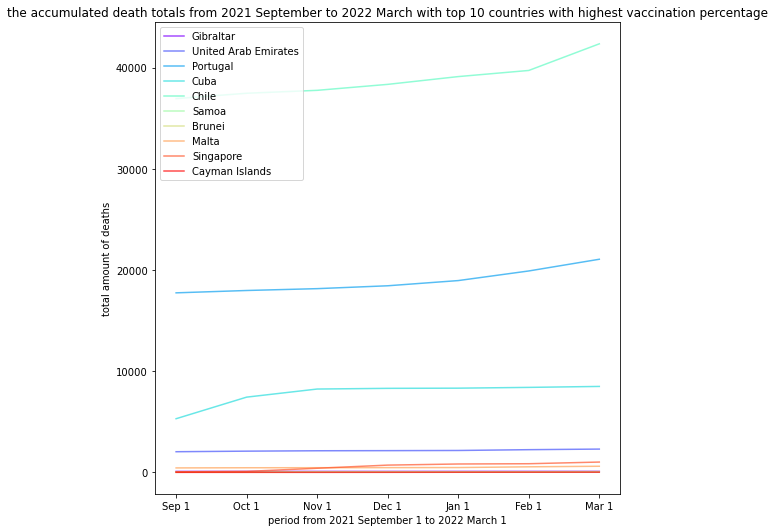

In [28]:
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True
overlapping = 0.7
colors = cm.rainbow(np.linspace(0, 1, 10))
##################################################################################
topdf = pd.DataFrame(merged_df)
topdf = topdf.sort_values(by = 'Percent', ascending = False)[:10]
topdf = topdf.drop(['Deaths / million', 'Deaths', 'Cases', 'Deaths / Cases', 'Vaccinated / Cases', 'Deaths / Vaccinated', 'Jul 1', 'Aug 1', 'Vaccinated', 'Percent'], axis = 1)

some_countries = topdf.index
values = topdf
some_columns = topdf.columns

# YOUR CODE HERE #
for color, country in zip(colors, some_countries):
    plt.plot(values.loc[country, some_columns] ,c=color, alpha=overlapping, label=country)
# YOUR CODE HERE #
plt.title('the accumulated death totals from 2021 September to 2022 March with top 10 countries with highest vaccination percentage')
plt.xlabel('period from 2021 September 1 to 2022 March 1')
plt.ylabel('total amount of deaths')
plt.legend(loc = 'upper left')
plt.show()
##################################################################################

## 5-4. Plotting the Accumulated Death totals from 21-September to 22-March with top 10 countries with lowest vaccination percentage.

Find the top 10 countries with lowest vaccination percentage. 

Extract the accumulated death totals from Sep 1 (2021) to Mar 1 (2022) and plot it using matplotlib (the visualization should be line plots with a legend in upper left corner)

#### HINT:  Use the pandas function to sort the dataframe so that you get the top 10 countries and their associated data needed for plotting

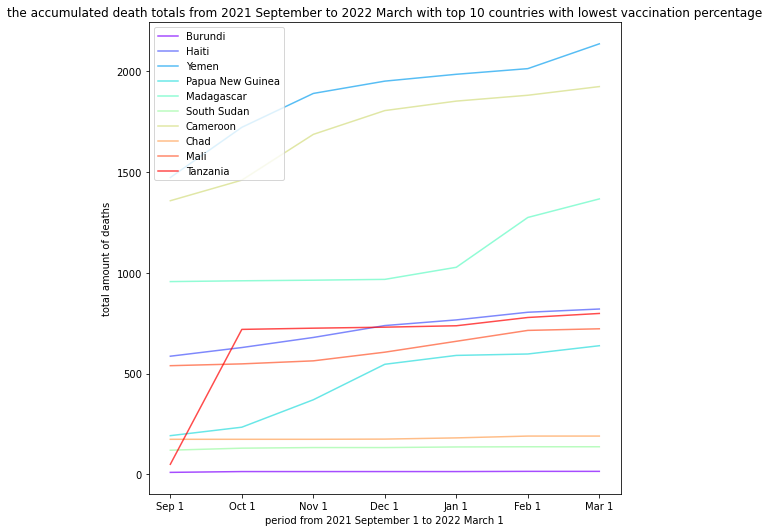

In [29]:
plt.rcParams["figure.figsize"] = [7.50, 7.50]
plt.rcParams["figure.autolayout"] = True
overlapping = 0.7
colors = cm.rainbow(np.linspace(0, 1, 10))
##################################################################################
botdf = pd.DataFrame(merged_df)
botdf = botdf.sort_values(by = 'Percent', ascending = True)[:10]
botdf = botdf.drop(['Deaths / million', 'Deaths', 'Cases', 'Deaths / Cases', 'Vaccinated / Cases', 'Deaths / Vaccinated', 'Jul 1', 'Aug 1', 'Vaccinated', 'Percent'], axis = 1)

some_countries = botdf.index
values = botdf
some_columns = botdf.columns

# YOUR CODE HERE #
for color, country in zip(colors, some_countries):
    plt.plot(values.loc[country, some_columns] ,c=color, alpha=overlapping, label=country)
# YOUR CODE HERE #
plt.title('the accumulated death totals from 2021 September to 2022 March with top 10 countries with lowest vaccination percentage')
plt.xlabel('period from 2021 September 1 to 2022 March 1')
plt.ylabel('total amount of deaths')
plt.legend(loc = 'upper left')
plt.show()
##################################################################################